In [232]:
import numpy as np
import numpy.random as rnd
from numpy import linalg as la
import matplotlib.pyplot as plt
import networkx as nx
import scipy.cluster.vq as vq

In [233]:
P1 = np.array([[0.12, 0.10, 0.02], [0.80, 0.80, 0.80], [0.08, 0.10, 0.18]])
P1

array([[0.12, 0.1 , 0.02],
       [0.8 , 0.8 , 0.8 ],
       [0.08, 0.1 , 0.18]])

In [234]:
states = ['A', 'B', 'C']
indices = range(len(states))

In [235]:
state2index = dict(zip(states, indices)) 
index2state = dict(zip(indices, states))

# Problem 1

## Part (a, b, c)

In [236]:
E1 = P1[state2index['B'], state2index['A']]*P1[state2index['A'], state2index['B']]
L1 = np.log(P1[state2index['B'], state2index['A']]) + np.log(P1[state2index['A'], state2index['B']])
print("the NPC is in room A, goes to room B, and immediately returns to room A probability: %s" % np.round(E1, 2))
print("the NPC is in room A, goes to room B, and immediately returns to room A liklihood: %s" % np.round(L1, 2))


the NPC is in room A, goes to room B, and immediately returns to room A probability: 0.08
the NPC is in room A, goes to room B, and immediately returns to room A liklihood: -2.53


## Part (d)

In [237]:
t = 5
E2 = 1
for i in range(t):
    E2 = E2*P1[state2index['B'], state2index['B']]
E2 = E2*P1[state2index['C'], state2index['B']]
print("the NPC is currently in room B, stays there for the next 5 time steps, and then enters room C probability: %s" % np.round(E2, 2))


the NPC is currently in room B, stays there for the next 5 time steps, and then enters room C probability: 0.03


## Part (e)

In [238]:
t = 5
E3 = 1
for i in range(t):
    E3 = E3*P1[state2index['A'], state2index['A']]
E3 = E3*(1-P1[state2index['A'], state2index['A']])
L3 = t*np.log(P1[state2index['A'], state2index['A']]) + np.log(1-P1[state2index['A'], state2index['A']])
print("the NPC is currently in room A, stays there for the next 5 time steps, and then goes to another room probability: %s" % np.round(E3, 4))
print("the NPC is currently in room A, stays there for the next 5 time steps, and then goes to another room liklihood: %s" % np.round(L3, 4))


the NPC is currently in room A, stays there for the next 5 time steps, and then goes to another room probability: 0.0
the NPC is currently in room A, stays there for the next 5 time steps, and then goes to another room liklihood: -10.7292


# Problem 2

## Part (a)

In [306]:
def generateStateSequence(s, P, tau):
    sseq = [s]
    iold = state2index[s]
    
    for t in range(tau):
        inew = rnd.choice(indices, p = P[:,iold])
        sseq.append(index2state[inew])
        iold = inew
    
    return sseq

In [307]:
sseq = generateStateSequence('B', P1, 19)
print(*sseq)

B B B B B B B A C B B B B B B B C B B B


## Part (b)

In [308]:
iseq = [state2index[s] for s in sseq]
tmax = len(sseq)
like1 = np.sum([ np.log(P1[iseq[t],iseq[t-1]]) for t in range(1,tmax) ]) 
print("Log liklihood of the generated sequence: %s" % np.round(like1,2))

Log liklihood of the generated sequence: -10.7


## Part (c)

In [242]:
probemap = {}
tmax = 10000
for i in range(tmax):
    probemap[i] = generateStateSequence('B', P1, 19)

In [243]:
liklihood = [0] * tmax
for key, iseq in probemap.items():
    liklihood[key] =np.sum([ np.log(P1[state2index[iseq[t]],state2index[iseq[t-1]]]) for t in range(1,20) ])

In [244]:
avgLog = np.mean(liklihood)
print("Average Log liklihood: %s" % np.round(avgLog, 2))

varLog = np.var(liklihood)
print("Variance Log liklihood: %s" % np.round(varLog, 2))

Average Log liklihood: -11.98
Variance Log liklihood: 12.55


# Problem 3

## Part (a) 

In [343]:
data = "ACAACACAACACAACCCCBCBAAAAACCCABCCCABCAAACACCCCAAACACAACBBBCACCAACAABCCAACCCCACABACACCACCCCCCBACCBACABCCAACCCCCABAAAACABCABCAACAACCBAAACACAAAACCBAAAABCCABCACAABAABAAACACBBABBAC"
data = data.strip()

In [344]:
def estimateStateTransitions(indices, iseq):
    k = len(indices)
    P = np.zeros((k, k))
    for t in range(1, len(iseq)):
        P[iseq[t], iseq[t-1]] += 1
    
    return np.divide(P, np.sum(P, axis = 0))

In [345]:
sseq = list(data)
states = sorted(list(set(sseq))) 
indices = list(range(len(states)))

In [346]:
state2index = dict(zip(states, indices)) 
index2state = dict(zip(indices, states))

In [347]:
iseq = [state2index[s] for s in sseq]

In [349]:
P2_raw = estimateStateTransitions(indices, iseq)
P2 = np.round(estimateStateTransitions(indices, iseq), 2)
P2

array([[0.42, 0.44, 0.46],
       [0.17, 0.16, 0.11],
       [0.41, 0.4 , 0.42]])

## Part (b)

In [350]:
iseq = [state2index[s] for s in sseq]
tmax = len(sseq)
like2 = np.sum([ np.log(P2_raw[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])
print("Log liklihood of the given sequence: %s" % np.round(like2,2))


Log liklihood of the given sequence: -174.31


# Problem 4

## Part (a)

In [95]:
def findPiOptOne(P):
    evals, evecs = la.eig(P) 
    vecPI = evecs[:,0]
    vecPI = vecPI / np.sum(vecPI)
    
    return vecPI

In [100]:
def findPiOptTwo(P):
    matP = P
    m = matP.shape[0]
    vecB = np.hstack((np.zeros(m), 1))
    matI = np.eye(m)
    matA = np.vstack((matI-matP, np.ones(m)))
    vecPI = la.lstsq(matA, vecB)[0]
    
    return vecPI

In [360]:
print("Stationary vector for P1 : %s" % np.round(findPiOptOne(P1), 2))
print("Stationary vector for P2 : %s" % np.round(findPiOptOne(P2_raw), 2))

Stationary vector for P1 : [0.09 0.8  0.11]
Stationary vector for P2 : [0.44 0.14 0.41]


## Part (b)

In [208]:
print("the likeliest room under model λ3 is: %s" % max(np.round(findPiOptOne(P1), 2)))
print("the likeliest room under model λ4 is : %s" % max(np.round(findPiOptOne(P2_raw), 2)))

the likeliest room under model λ3 is: 0.8
the likeliest room under model λ4 is : 0.44


# Problem 5

In [315]:
matX = np.loadtxt('q3dm1-path1.csv', delimiter = ',')

In [316]:
matX.shape

(1327, 3)

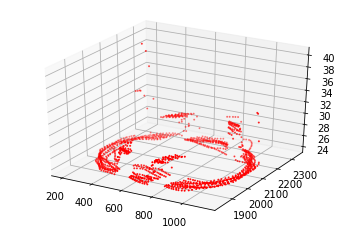

In [317]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x1_axis = matX.T[0, :]
y1_axis = matX.T[1, :]
z1_axis = matX.T[2, :]
ax.scatter3D(x1_axis, y1_axis, z1_axis, c='r', s=1);

In [318]:
def findDist(x, y):
    return np.sum((x - y) ** 2)

In [319]:
def initSOM(matX, k, l=0):
    G = nx.generators.lattice.grid_2d_graph(k, 1, periodic = True)
    G = nx.convert_node_labels_to_integers(G, first_label = l)
    
    m, n = matX.shape
    smpl = np.random.choice(n, k, replace = False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[:, smpl[i]]
    
    return G

In [320]:
def trainSOMV2(matX, G, tmax=1000, sigma0=1., eta0=1.): 
    m, n = matX.shape
    matW = np.vstack([G.nodes[v]['w'] for v in G.nodes()]).T 
    m, k = matW.shape
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2 
    smpl = np.random.randint(0, n, size=tmax)
    for t in range(tmax):
    # NOTE: for all of the below to work, we must reshape the sampled column of X 
        vecX = matX[:,smpl[t]].reshape(m,1)
        b = np.argmin(np.sum((matW - vecX)**2, axis=0)) 
        eta = eta0 * (1. - t/tmax)
        sigma = sigma0 * np.exp(-t/tmax)
        vecH = np.exp(-0.5 * matD[b,:]/sigma**2) 
        matW += eta * vecH * (vecX - matW)
        for i, v in enumerate(G):
            G.nodes[v]['w'] = np.ravel(matW[:,i])
    return G

## Part (a)

In [321]:
graph1 = initSOM(matX.T, 24, 0)

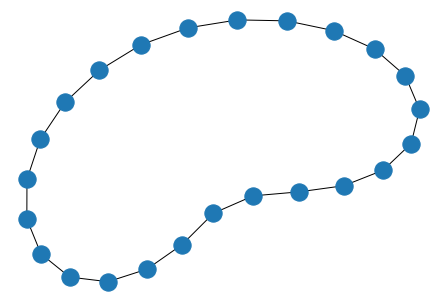

In [322]:
nx.draw(graph1)

In [323]:
output = trainSOMV2(matX.T, graph1, 5000)

In [324]:
matW = np.vstack([output.nodes[v]['w'] for v in output.nodes()]).T 
xc, yc, zc = matW[0], matW[1], matW[2]

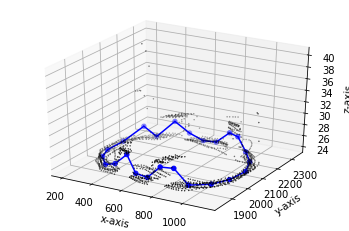

In [325]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x1_axis = matX.T[0, :]
y1_axis = matX.T[1, :]
z1_axis = matX.T[2, :]
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.scatter3D(x1_axis, y1_axis, z1_axis, c = 'black', s=0.2);

for i in output.edges:
    x, y = i
    ax.plot3D([xc[x], xc[y]], [yc[x], yc[y]], [zc[x], zc[y]], "b")
ax.scatter3D(xc, yc, zc, c = 'b', s=20);

## Part (b)

In [326]:
E = []
m, n = matX.shape

for i in range(m):
    E.append(np.min([np.sum((matX[i, :] - output.nodes[j]['w']) ** 2) for j in output.nodes]))

print("Mean Square error: %s" % np.round(np.mean(E), 2))

Mean Square error: 1396.21


# Problem 6

## Part (a)

In [327]:
graph1 = initSOM(matX.T, 12, 0)
graph2 = initSOM(matX.T, 12, 12)

In [328]:
graph2.nodes

NodeView((12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23))

In [329]:
g = nx.disjoint_union(graph1, graph2)
i = 0
j = 12
while i < 12 and j < 24:
    g.add_edge(i, j)
    i += 1
    j += 1

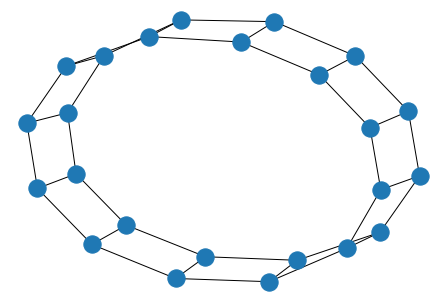

In [330]:
nx.draw(g)

In [331]:
output = trainSOMV2(matX.T, g, 5000)

In [332]:
matW = np.vstack([output.nodes[v]['w'] for v in output.nodes()]).T 
xc, yc, zc = matW[0], matW[1], matW[2]

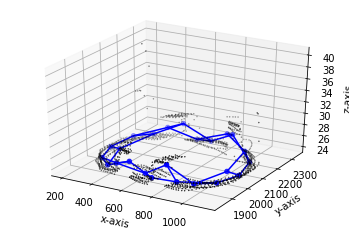

In [333]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x1_axis = matX.T[0, :]
y1_axis = matX.T[1, :]
z1_axis = matX.T[2, :]
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.scatter3D(x1_axis, y1_axis, z1_axis, c = 'black', s=0.2);

for i in output.edges:
    x, y = i
    ax.plot3D([xc[x], xc[y]], [yc[x], yc[y]], [zc[x], zc[y]], "b")
ax.scatter3D(xc, yc, zc, c = 'b', s=20);

## Part (b) 

In [334]:
E = []
m, n = matX.shape

for i in range(m):
    E.append(np.min([np.sum((matX[i, :] - output.nodes[j]['w']) ** 2) for j in output.nodes]))

print("Mean Square error: %s" % np.round(np.mean(E), 2))

Mean Square error: 1520.33


# Problem 7

# Part (a)

In [364]:
m, n = matX.shape
v = []
for i in range(1, m):
    v.append(list(matX[i] - matX[i-1]))
    
v = np.array(v)

In [365]:
print("Mean of the velocity: %s" % np.round(np.divide(np.sum(v, axis=0), len(v)), 4))

Mean of the velocity: [0.0041 0.0165 0.    ]


## Part (b)

In [376]:
matN, indy = vq.kmeans2(v, k = 9, iter = 100, minit = '++')

In [377]:
print("Mean of actions: %s" % np.round(np.divide(np.sum(matN, axis =0), 9), 4))

Mean of actions: [1.7298 0.0721 0.0206]


## Part (c) 

In [339]:
def estimateKMeans(v, clusters):
    return vq.kmeans2(v, k = clusters, iter = 100, minit = 'points')

In [363]:
k = [10, 100, 1000]

E_v = np.divide(np.sum(v, axis=0), len(v))

for i in k:
    matN, indy = estimateKMeans(v, i)
    E_a = np.divide(np.sum(matN, axis =0), i)
    print("Euclidean distance between E[v] and E[a]: %s" % np.round(np.linalg.norm(E_v - E_a), 4))

Euclidean distance between E[v] and E[a]: 1.9169
Euclidean distance between E[v] and E[a]: 0.602
Euclidean distance between E[v] and E[a]: 0.193


With the increasing number of clusters the probability of chosing random points which cluster the points in a correct manner also increases. Since, k = 10 can sometimes results in a good solution but in an avaerage with k = 1000 points cluster gives us a better solution.

# Problem 8

## Part (a)

a[t] = gives us the set of actions to which each velocity corresponds to.
So, we can compute the conditional probability of P(a_1 | a_0) by counting the sequence of which action has taken w.r.t previous action.

P = np.zeros((num_actions, num_actions))

for i in range(1, len(a)):
    P[a[i], a[i-1]] += 1

Then normalize it with total sum of the column action which makes it column stochastic.
P = np.divide(P, axis=0)

P(a(t)/ a(t-1)a(t-2)...a(t-T)) = P(a(t)/a(t-1)) * P(a(t-1)/a(t-2))....P(a(t-T+1)/a(t-T))

## Part (b)

To genearate the movement of a NPC we can use the conditional probability matrix to determine the possible movement. In order to use the transition matrix appropriately, we could use the prior sequence taken by the NPC player into account for further computing the next step. 

If a NPC has travlled through 5 states, one could easily compute the probability of the set of all possible states by the conditional probabilites in which NPC can progress. Finally, NPC can take that step which has the maximum probability.